In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Escriva and Chulmoon

In [30]:
r = np.linspace(0, 5, 256)
delta = 1
r0 = 0.5
p0 = 1 # needs to be >0.5
C = delta * ((r/r0)**2) * np.exp(1 - ((r/r0)**(2*p0)))

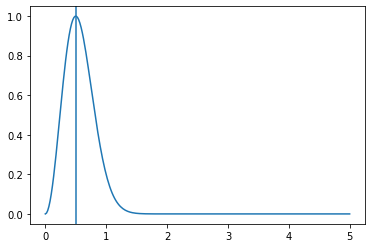

In [31]:
plt.plot(r, C)
plt.axvline(x = r0)

In [32]:
K = 3*C / (2*r**2)
K[0] = K[1]

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


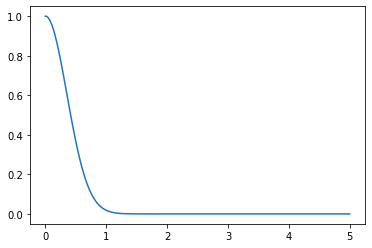

In [33]:
plt.plot(r, K/K[0])

In [34]:
w = 1/3
rm1 = r0
drC = delta * (2*r*((1/r0)**2) * np.exp(1 - ((r/r0)**(2*p0))) 
               - 2*p0 * (r**(2*p0-1+2)) * ((1/r0)**(2*p0+2)) 
               * np.exp(1 - ((r/r0)**(2*p0))))
drK = (3/2) * ((drC*(r**2) - C*2*r)/ r**4)
delta = (3*(1+w)/(5+3*w)) * (K + (r*drK)/3) * (rm1**2)
delta[0] = delta[1]

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


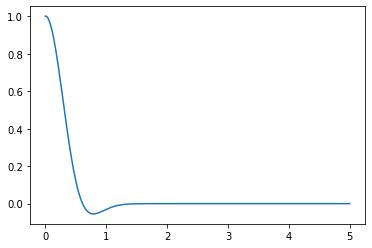

In [35]:
plt.plot(r, delta/delta[0])

# Musco

In [57]:
r = np.linspace(0, 5, 256)
A = 1
Delta = 1
l = 0
a = 1  # most important parameter
K = A * ((r/Delta)**(2*l)) * np.exp( - ((r/Delta)**(2*a))/2)
epsilon = 1
w = 1/3
fw = 3 * (1+w)/(5+3*w)
delta = (epsilon**2) * fw * (1 + (2*l/3) - (a/3) * (r/Delta)**(2*a)) * K

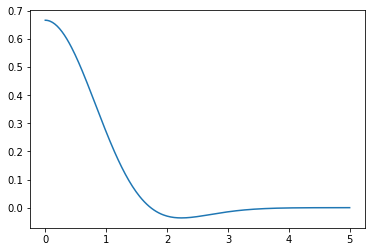

In [58]:
plt.plot(r, delta)

# De Jong

## stationary

$\partial_t \alpha = \frac{1}{2}\alpha K + \beta^i \partial_i \alpha$

$\partial_t \beta^i = \frac{3}{4}B^i$

$\partial_t B^i = \beta^i\partial_j\bar{\Gamma}^i + \partial_t\bar{\Gamma}^i - 10^{-4}B^i$

In [12]:
r = np.linspace(0, 10, 256)
Deltaxi = 1
R0 = 5
sigma = 0.5
xi = Deltaxi * np.tanh((r - R0)/sigma)
drxi = (Deltaxi/sigma) / np.cosh((r - R0)/sigma)**2

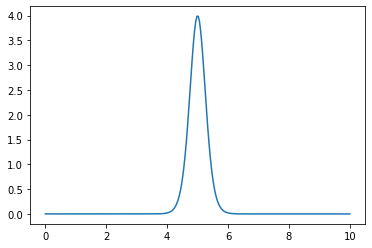

In [14]:
plt.plot(r, drxi**2)

## rotating

In [35]:
mpl = 1
m = 62
phiIN = 0.0078*mpl 
HIN = 4*np.pi*(m**2)*(phiIN**2)/(3*(mpl**2))
A = 0.0875*mpl
R0 = 1.4/HIN
l = 0.15/HIN
B = 0.5
k = 2
omega = 12/HIN

L = 2*HIN
N = 256
x1d = np.linspace(-L, L, N)
x, y, z = np.meshgrid(x1d, x1d, x1d, indexing='ij')
r = np.sqrt(x**2 + y**2 + z**2)
phi = np.sign(y)*np.arccos(x/np.sqrt(x**2 + y**2))
theta = np.arccos(z/r)

tIN = 3*HIN/2

R = A * np.exp(-(r - R0)**2 / l**2)
Phi = B * np.cos(k * phi - omega * tIN)
xi = R * (1 + np.sin(theta) * Phi)

In [46]:
drR = (- 2 * (r - R0) / l**2) * R
drXi = drR * (1 + np.sin(theta) * Phi)
dthetaXi = R * Phi * np.cos(theta)
dphiPhi = -k * B * np.sin(k * phi - omega * tIN)
dphiXi = R * np.sin(theta) * dphiPhi

drdrR = (- 2 / l**2) * R + (- 2 * (r - R0) / l**2) * drR
drdrXi = drdrR * (1 + np.sin(theta) * Phi)
dthetadthetaXi = - R * Phi * np.sin(k * phi - omega * tIN)
dthetasindthetaXi = np.sin(theta)*dthetadthetaXi - np.cos(theta)*dthetaXi
dphidphiPhi = - (k**2) * Phi
dphidphiXi = R * np.sin(theta) * dphidphiPhi

dXi = (drdrXi + (drXi*2/r) 
       + (dthetasindthetaXi/(r*r*np.sin(theta))) 
       + (dphidphiXi/(r*np.sin(theta))**2))

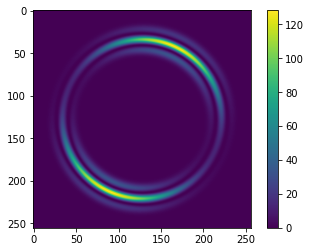

In [47]:
plt.imshow((dXi[:, :, int(N/2)])**2)
plt.colorbar()

# Hawke and Stewart

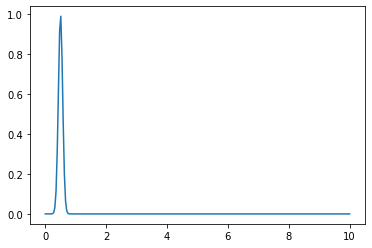

In [67]:
r = np.linspace(0, 10, 256)
C = 1 # strength of the perturbation
# they searched for the critical C to make a black hole
f = np.exp(-100 * (r**2)) # density profile
f = np.exp(-100 * ((r-0.5)**2))
delta = C * f
plt.plot(r, delta)

# Shibata Sasaki

In [ ]:
#delta = spherical Bessel function of 0th order

# What shall I do?

In [9]:
# Grid
HIN = 2/3
L = 20
N = 256
x1d = np.linspace(-L, L, N)
x, y, z = np.meshgrid(x1d, x1d, x1d, indexing='ij')
r = np.sqrt(x**2 + y**2 + z**2)

# paramters
RcA = -1     # amplitude
Rcsx = (3**(1/4))      # variance
Rcsy = (3**(1/4))      # variance
Rcsz = (3**(1/4))      # variance
Rcax = 1      # steepness of profile, most important
Rcay = 1      # steepness of profile, most important
Rcaz = 1      # steepness of profile, most important

# profile
tRcax = 2*Rcax
tRcay = 2*Rcay
tRcaz = 2*Rcaz
fac =  - (1/2)
expx = np.exp(fac * ((x/Rcsx)**tRcax))
expy = np.exp(fac * ((y/Rcsy)**tRcay))
expz = np.exp(fac * ((z/Rcsz)**tRcaz))
Rc = RcA * expx * expy * expz

# 1st order derivative
dxexpx = fac * tRcax * (x**(tRcax-1)) * expx / (Rcsx**tRcax)
dyexpy = fac * tRcay * (y**(tRcay-1)) * expy / (Rcsy**tRcay)
dzexpz = fac * tRcaz * (z**(tRcaz-1)) * expz / (Rcsz**tRcaz)

# 2nd order derivative
dxdxexpx = ((fac * tRcax * (tRcax-1) * (x**(tRcax-2)) * expx / (Rcsx**tRcax)) 
          + (fac * tRcax * (x**(tRcax-1)) * dxexpx / (Rcsx**tRcax)))
dydyexpy = ((fac * tRcay * (tRcay-1) * (y**(tRcay-2)) * expy / (Rcsy**tRcay)) 
          + (fac * tRcay * (y**(tRcay-1)) * dyexpy / (Rcsy**tRcay)))
dzdzexpz = ((fac * tRcaz * (tRcaz-1) * (z**(tRcaz-2)) * expz / (Rcsz**tRcaz)) 
          + (fac * tRcaz * (z**(tRcaz-1)) * dzexpz / (Rcsz**tRcaz)))
dxdxRc = RcA * dxdxexpx * expy * expz
dydyRc = RcA * expx * dydyexpy * expz
dzdzRc = RcA * expx * expy * dzdzexpz

ddRc = dxdxRc + dydyRc + dzdzRc

In [10]:
L

20

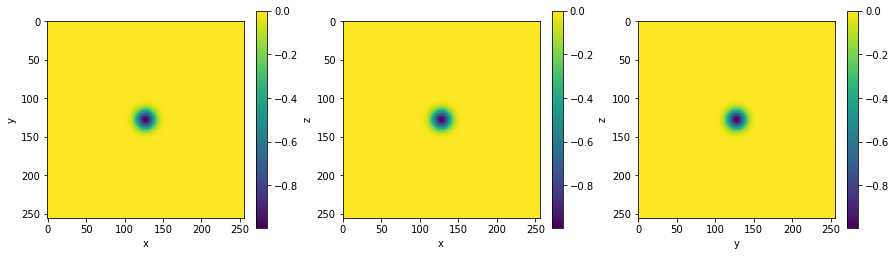

In [11]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.imshow(Rc[:, :, int(N/2)].T)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.subplot(132)
plt.imshow(Rc[:, int(N/2), :].T)
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()
plt.subplot(133)
plt.imshow(Rc[int(N/2), :, :].T)
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

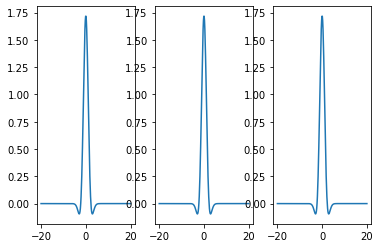

In [12]:
plt.subplot(131)
plt.plot(x[:, int(N/2), int(N/2)], ddRc[:, int(N/2), int(N/2)])
plt.subplot(132)
plt.plot(y[int(N/2), :, int(N/2)], ddRc[int(N/2), :, int(N/2)])
plt.subplot(133)
plt.plot(z[int(N/2), int(N/2), :], ddRc[int(N/2), int(N/2), :])

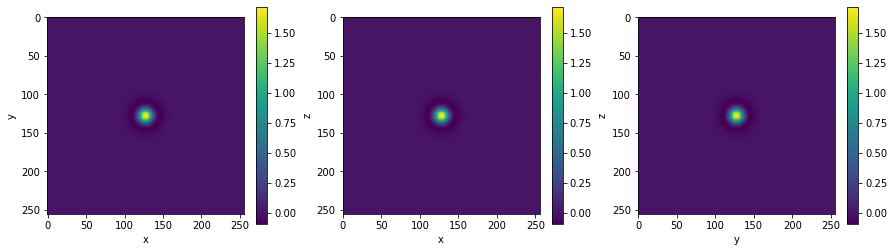

In [13]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.imshow(ddRc[:, :, int(N/2)].T)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.subplot(132)
plt.imshow(ddRc[:, int(N/2), :].T)
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()
plt.subplot(133)
plt.imshow(ddRc[int(N/2), :, :].T)
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()